<a href="https://colab.research.google.com/github/kimheeseo/python_summary/blob/main/truncated_normal%2CBCEwithLogitsLoss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **softplus**

In [2]:
import torch
import torch.nn as nn

m=nn.Softplus()
input=torch.randn(2)
print('input값',input)
output=m(input)
print('output값',output)

output값 tensor([0.9563, 0.7292])


In [6]:
import tensorflow as tf
x=tf.constant([0.4712, 0.0708])
y=tf.nn.softplus(x)
print('y값',y)

y값 tf.Tensor([0.95624787 0.7291736 ], shape=(2,), dtype=float32)


# **tf.truncated_normal**

In [21]:
import tensorflow as tf
x=tf.Variable(tf.random.truncated_normal((100000,)))#,dtype=tf.float32, stddev=1, seed=1))
x

<tf.Variable 'Variable:0' shape=(100000,) dtype=float32, numpy=
array([ 0.8683421 ,  1.1939509 , -0.2748588 , ...,  1.4177058 ,
        0.03919997, -0.7468782 ], dtype=float32)>

(array([ 3288.,  6390., 10119., 13893., 16226., 16359., 13961., 10218.,
         6227.,  3319.]),
 array([-1.9998413e+00, -1.5998716e+00, -1.1999021e+00, -7.9993242e-01,
        -3.9996278e-01,  6.8545341e-06,  3.9997649e-01,  7.9994613e-01,
         1.1999158e+00,  1.5998855e+00,  1.9998550e+00], dtype=float32),
 <a list of 10 Patch objects>)

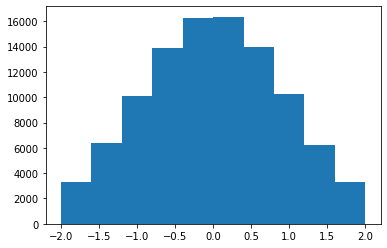

In [22]:
import matplotlib.pyplot as plt
plt.hist(x)

(array([ 3423.,  6326., 10090., 13925., 16241., 16225., 14088.,  9962.,
         6328.,  3392.]),
 array([-1.9999492e+00, -1.5999665e+00, -1.1999838e+00, -8.0000108e-01,
        -4.0001836e-01, -3.5643578e-05,  3.9994708e-01,  7.9992980e-01,
         1.1999125e+00,  1.5998952e+00,  1.9998779e+00], dtype=float32),
 <a list of 10 Patch objects>)

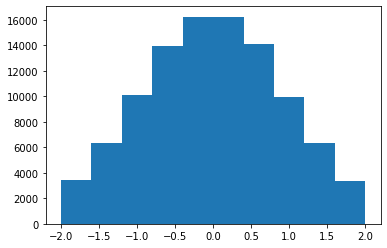

In [33]:
y=tf.compat.v1.truncated_normal([100000,], mean=0.0, stddev=1.0, dtype=tf.float32)
plt.hist(y)

In [27]:
def truncated_normal(t, mean=0.0, std=0.01):
    torch.nn.init.normal_(t, mean=mean, std=std)
    while True:
      cond = torch.logical_or(t < mean - 2*std, t > mean + 2*std)
      if not torch.sum(cond):
        break
      t = torch.where(cond, torch.nn.init.normal_(torch.ones(t.shape), mean=mean, std=std), t)
    return t

In [40]:
import torch.nn.init as init
x = init.uniform_(torch.Tensor(10,1),-2,2)

print(x)

tensor([[ 0.0142],
        [-0.2967],
        [ 1.7525],
        [-1.5052],
        [ 0.3921],
        [ 0.9341],
        [ 1.7351],
        [-1.0575],
        [-0.3688],
        [-1.4180]])


In [35]:
num_edges=5
xx=tf.Variable(tf.random.truncated_normal([num_edges],dtype=tf.float32,stddev=1.0))
print(xx)

<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
array([-0.2899443 , -0.7069553 ,  0.19897437,  1.4516197 , -1.3188944 ],
      dtype=float32)>


In [41]:
xx2 = init.uniform_(torch.Tensor(5),-2,2)
print(xx2)

tensor([-1.1652,  1.1253,  1.4852, -1.7409, -1.6314])


# **sigmoid_cross_entropy_with_logits**

In [62]:
logits = tf.constant([[ 1.0991,  0.5861, -1.0238, -0.4700,  0.5643],
        [ 1.4258,  0.6036, -0.7815, -1.3200,  0.6459],
        [-0.0199, -1.5941,  1.9586,  0.0447,  1.2787]])
labels = tf.constant([[0.1708, 0.0892, 0.3162, 0.1390, 0.2847],
        [0.5198, 0.2283, 0.0566, 0.0981, 0.0973],
        [0.0381, 0.6169, 0.1212, 0.0572, 0.1665]])
a=tf.nn.sigmoid_cross_entropy_with_logits(
    labels=labels, logits=logits).numpy()
print('a값',a)    

a값 [[1.1989338  0.9762553  0.63064194 0.55083925 0.8539281 ]
 [0.90003544 0.90201193 0.42110574 0.3662507  1.0045174 ]
 [0.68400484 1.1682947  1.8531717  0.7131901  1.311405  ]]


In [43]:
tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits))/10

<tf.Tensor: shape=(), dtype=float32, numpy=0.07617841>

In [60]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
print('input',input)
target = torch.randn(3, 5).softmax(dim=1)
print('target',target)

output = loss(input, target)
print('output',output)

input tensor([[ 1.0991,  0.5861, -1.0238, -0.4700,  0.5643],
        [ 1.4258,  0.6036, -0.7815, -1.3200,  0.6459],
        [-0.0199, -1.5941,  1.9586,  0.0447,  1.2787]], requires_grad=True)
target tensor([[0.1708, 0.0892, 0.3162, 0.1390, 0.2847],
        [0.5198, 0.2283, 0.0566, 0.0981, 0.0973],
        [0.0381, 0.6169, 0.1212, 0.0572, 0.1665]])
output tensor(2.1615, grad_fn=<DivBackward1>)


# **+) sigmoid_cross_entropy_with_logits**
출처 : https://wikidocs.net/69289

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #텐서플로우 v2 에서도 실행 가능하게 하기
tf.compat.v1.random.set_random_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([
    [0], 
    [0], 
    [0], 
    [1], 
    [1], 
    [0], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [0]
])

labels = ['fail', 'pass']

##########데이터 분석

##########데이터 전처리

##########모델 생성

X = tf.compat.v1.placeholder(tf.float32, shape=[None, 2])
Y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1])
print('Y값',Y)
W = tf.Variable(tf.random.uniform(shape=[2, 1])) 
b = tf.Variable(tf.random.uniform(shape=[1]))
logits = tf.matmul(X, W) + b

predictions = tf.nn.sigmoid(logits)

##########모델 학습

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)
print('cross_entropy값',cross_entropy)

loss = tf.reduce_mean(cross_entropy)
print('loss값',loss)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

epochs = 50
for epoch_index in range(epochs):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    loss_value = sess.run(loss, feed_dict={X: x_data, Y: y_data})

    print('epoch: {}/{}, loss: {:.4f}'.format(epoch_index+1, epochs, loss_value))

##########모델 검증

##########모델 예측

x_test = np.array([
    [4, 6]
])

y_predict = sess.run(predictions, feed_dict={X: x_test})

print(y_predict) #[[0.67222077]]
print(y_predict[0]) #[0.67222077]
print(y_predict[0][0]) #0.67222077
label = labels[1 if y_predict[0][0] > 0.5 else 0]
confidence = y_predict[0][0] if y_predict[0][0] > 0.5 else 1 - y_predict[0][0]
print(label, confidence) #

Y값 Tensor("Placeholder_11:0", shape=(None, 1), dtype=float32)
cross_entropy값 Tensor("logistic_loss_5:0", shape=(None, 1), dtype=float32)
loss값 Tensor("Mean_5:0", shape=(), dtype=float32)
epoch: 1/50, loss: 0.8743
epoch: 2/50, loss: 0.8720
epoch: 3/50, loss: 0.8696
epoch: 4/50, loss: 0.8673
epoch: 5/50, loss: 0.8650
epoch: 6/50, loss: 0.8627
epoch: 7/50, loss: 0.8604
epoch: 8/50, loss: 0.8581
epoch: 9/50, loss: 0.8558
epoch: 10/50, loss: 0.8535
epoch: 11/50, loss: 0.8512
epoch: 12/50, loss: 0.8489
epoch: 13/50, loss: 0.8466
epoch: 14/50, loss: 0.8443
epoch: 15/50, loss: 0.8420
epoch: 16/50, loss: 0.8398
epoch: 17/50, loss: 0.8375
epoch: 18/50, loss: 0.8352
epoch: 19/50, loss: 0.8330
epoch: 20/50, loss: 0.8307
epoch: 21/50, loss: 0.8285
epoch: 22/50, loss: 0.8262
epoch: 23/50, loss: 0.8240
epoch: 24/50, loss: 0.8218
epoch: 25/50, loss: 0.8195
epoch: 26/50, loss: 0.8173
epoch: 27/50, loss: 0.8151
epoch: 28/50, loss: 0.8129
epoch: 29/50, loss: 0.8107
epoch: 30/50, loss: 0.8085
epoch: 31/50

# **cross_entropy**

In [68]:
import torch
x_data=torch.tensor([[2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]])

y_data=torch.tensor([ [0], 
    [0], 
    [0], 
    [1], 
    [1], 
    [0], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [0]])
labels=['fail','pass']

In [93]:
X=torch.randn([1,2])
Y=torch.randn([1,1])
print('X값',X)
print('Y값',Y)

W=torch.randn([2,1])
b=torch.randn([1,1])
logits=torch.matmul(X,W)+b
print('logits값',logits)
m=nn.Sigmoid()
output=m(logits)
print('output값',output)

X값 tensor([[-1.2137, -1.7251]])
Y값 tensor([[-0.9701]])
logits값 tensor([[2.1934]])
output값 tensor([[0.8997]])


In [95]:
cross_entropy=nn.CrossEntropyLoss()
output=cross_entropy(logits, Y)
print('output값',output)
loss=torch.mean(output)
print('loss값',loss)

output값 tensor(-0.)
loss값 tensor(0.)


# **+) 지식인 참고**

In [100]:
import torch
import torch.nn as nn

# Define the input logits and target labels
logits = torch.tensor([[-1.0, 1.0, 0.0]])
labels = torch.tensor([[0.0, 1.0, 0.0]])

# Create a BCEWithLogitsLoss criterion
criterion = nn.BCEWithLogitsLoss()

# Compute the loss
loss = criterion(logits, labels)
print(loss)  # Outputs: tensor(0.4170)

tensor(0.4399)


In [121]:
import torch
import torch.nn as nn

# Define the input logits and target labels
logits = tf.constant([[-1.0, 1.0, 0.0]])
labels = tf.constant([[0.0, 1.0, 0.0]])
print('labels값',labels)

# Create a BCEWithLogitsLoss criterion
criterion = tf.nn.sigmoid_cross_entropy_with_logits

# Compute the loss
a=criterion(labels=labels,logits=logits)
print('a값',a)
loss =tf.reduce_mean(criterion(labels=labels,logits=logits))
print('loss값',loss)  # Outputs: tensor(0.4170)

sess = tf.compat.v1.Session()
with sess.as_default():
  print('loss값',loss.eval())
  print('labels값',labels.eval())
  aa=loss.eval()
print('aa값',aa)  
if aa>0:
  print('aa값은 0보다 크다.')

labels값 Tensor("Const_39:0", shape=(1, 3), dtype=float32)
a값 Tensor("logistic_loss_27:0", shape=(1, 3), dtype=float32)
loss값 Tensor("Mean_16:0", shape=(), dtype=float32)
loss값 0.43989018
labels값 [[0. 1. 0.]]
aa값 0.43989018
aa값은 0보다 크다.
